# Ad-click Analysis

## Goal

Advertising data table monitors ad clicks across **30** **different** **colors**. Our aim is to discover an ad color that generates significantly more clicks than <span style="color:blue; font-weight:bold">blue</span>.  
We will do so by following these steps:

---
## Plan

1. Load and clean our adverstising data using Pandas.
2. Measure the centrality and dispersion of sampled data 
3. Run a permutation test between blue and the other recorded colors.
4. Check the computed p-values for statistical significance using a properly determined significance level.

## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Data Check

- **Column 1: Color**  
  Each row in the column corresponds to one of 30 possible text colors.

- **Column 2: Click Count: Day 1**  
  The column tallies the times each colored ad was clicked on Day 1 of an experiment.

- **Column 3: View Count: Day 1**  
  The column tallies the times each ad was viewed on Day 1 of an experiment.  
  According to experiment, all daily views are expected to equal **100**.

- **Remaining Columns**  
  The next **38 columns** contain:
  - Click counts per day, and  
  - View counts per day  
  for the remaining **19 days** of the experiment.


In [2]:
df = pd.read_csv("colored_ad_click_table.csv")
num_rows, num_cols = df.shape
print(f"Table contains {num_rows} rows and {num_cols} cols")
print(df.columns)

Table contains 30 rows and 41 cols
Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20'

In [3]:
print(df.Color.values)


['Pink' 'Gray' 'Sapphire' 'Purple' 'Coral' 'Olive' 'Navy' 'Maroon' 'Teal'
 'Cyan' 'Orange' 'Black' 'Tan' 'Red' 'Blue' 'Brown' 'Turquoise' 'Indigo'
 'Gold' 'Jade' 'Ultramarine' 'Yellow' 'Virdian' 'Violet' 'Green'
 'Aquamarine' 'Magenta' 'Silver' 'Bronze' 'Lime']


In [4]:
selected_cols = ['Color','Click Count: Day 1','View Count: Day 1']
print(df[selected_cols].describe())

       Click Count: Day 1  View Count: Day 1
count           30.000000               30.0
mean            23.533333              100.0
std              7.454382                0.0
min             12.000000              100.0
25%             19.250000              100.0
50%             24.000000              100.0
75%             26.750000              100.0
max             49.000000              100.0


In [5]:
view_cols = [column for column in df.columns if 'View' in column]
assert np.all(df[view_cols].values == 100)

Each color receives daily 100 views. Therefore, all 20 View Count columns are redundant.  
Let's remove them.

In [6]:
df.drop(columns=view_cols, inplace=True)
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')


Our 20 Click Count columns correspond to the number of clicks per 100 daily views, so we can treat these columns as percentages

In [7]:
df.set_index('Color', inplace=True)
print(df.T.Blue.describe())

count    20.000000
mean     28.350000
std       5.499043
min      18.000000
25%      25.750000
50%      27.500000
75%      30.250000
max      42.000000
Name: Blue, dtype: float64


The daily click percentages for blue range from 18% to 42%. The mean percent of clicks is 28.35%.  
  
How does it compare to the other 29 colors ? Let's find it out.

In [8]:
df_not_blue = df.T.drop(columns='Blue')
df_not_blue.head()

Color,Pink,Gray,Sapphire,Purple,Coral,Olive,Navy,Maroon,Teal,Cyan,...,Ultramarine,Yellow,Virdian,Violet,Green,Aquamarine,Magenta,Silver,Bronze,Lime
Click Count: Day 1,21,27,30,26,26,26,38,21,25,24,...,49,14,27,15,14,24,18,26,19,20
Click Count: Day 2,20,27,32,21,24,19,29,29,25,22,...,41,24,23,22,25,28,21,24,19,19
Click Count: Day 3,14,26,30,16,25,20,30,24,32,34,...,24,20,24,22,29,25,23,18,27,22
Click Count: Day 4,30,17,26,17,27,23,32,22,28,23,...,36,17,22,20,30,35,19,32,18,26
Click Count: Day 5,12,29,32,23,36,27,29,22,25,23,...,34,18,22,26,26,31,21,32,19,29


Table contains the percent of clicks for 29 colors. We need to compare these percentages to our blue percentages.  
  
More precisely, we want to know if there exists a color whose mean click rate is statistically different  from the mean click rate of blue.  
  
The sample mean is easily obtainable, but we do not have a population mean. Thus, our best option is to run a permutation test.

In [9]:
def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b)
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() -  sample_b.mean()) >= extreme_mean_diff:
            number_extreme_values +=1 
    p_value = number_extreme_values / 30000
    return p_value

We will run a permutation test between blue and the other 29 colors. Then we'll sort these colors based on their p-values results.

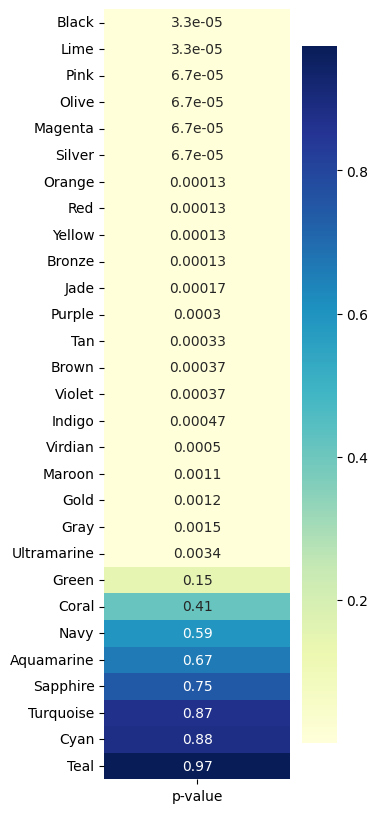

In [10]:
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks)
    color_to_p_value[color] = p_value
sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(),key=lambda x:x[1]))
plt.figure(figsize=(3,10))
sns.heatmap([[p_value] for p_value in sorted_p_values],cmap='YlGnBu', annot=True, xticklabels=['p-value'],
                                                                                               yticklabels=sorted_colors)
plt.show()

The majority of colors generate a p-value that is noticably lower than 0.05. Black has the lowest p-value:  
its ad-click percentages must deviate significantly from the blue.  
But from the design perspective, black is not very clickable color.  
Text links are usually not black, because black links are hard to distinguish from the regular text.

In [11]:
mean_black = df_not_blue.Black.mean()
print(f"Mean click rate of black is {mean_black}")

Mean click rate of black is 21.6


The mean click rate of black is significantly lower than the blue mean of 28.35.   
Therefore, the statistical difference between the colors caused by fewer people clicking black.  
Let's filter out those colors whose mean is less than the mean of the blue.

In [12]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
size = remaining_colors.size
print(f"{size} colors have on average more clicks than Blue.")
print("These colors are:")
print(remaining_colors.values)

5 colors have on average more clicks than Blue.
These colors are:
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


Only five colors remain. Each of these colors is a different shade of blue.

In [13]:
for color, p_value in sorted(color_to_p_value.items(),key=lambda x: x[1]):
    if color in remaining_colors:
        mean_val = df_not_blue[color].mean()
        print(f"{color} has a p-value of {p_value}")

Ultramarine has a p-value of 0.0034
Navy has a p-value of 0.5911666666666666
Aquamarine has a p-value of 0.6654666666666667
Sapphire has a p-value of 0.7457666666666667
Teal has a p-value of 0.9745


 ### Determinining Statistical Significance
    
Four of the colors have large p-values. Only one color has a p-value that's small.  
It's mean of 34.2 is greater than blue's. Is that p-value is significant?  
That's more than 10 times lower than the standard significance level of 0.05. 
However that significance level doesn't take into the account our comparisons between blue and 29 other colors.  
Each comparison is an experiment testing whether a color differs from blue.  
If we run enough experiments, then we can guarantee that we encounter a low p-value sooner or later.  
The best way to correct for this is to execute a **Bonferroni correction** - otherwise, we will fall victim to p-value hacking.

In [14]:
# In order to do that we will lower significance level to 0.05/29
significance_level = 0.05 / 29
print(f"Adjusted significance level is {significance_level}")
if color_to_p_value['Ultramarine'] <= significance_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")

Adjusted significance level is 0.001724137931034483
Our p-value is not statistically significant


The p-value is not statistically significant. There is no valid reason to expect that black, brown or other color would outperform blue.  
Conceivably if we only compared blue to other five shades of blue, analysis would have been more fruitful.  
Let's explore the hypothetical situation where we start five experiments and ultramarine's p-value remains unchanged.

In [15]:
hypothetical_sig_lev = 0.05 / 5
print(f"Hypothetical significance level is {hypothetical_sig_lev}")
if color_to_p_value['Ultramarine'] <= hypothetical_sig_lev:
    print("Our hypothetical p-value would have been statistically significant")
else:
    print("Our hypothetical p-value would not have been statistically significant")

Hypothetical significance level is 0.01
Our hypothetical p-value would have been statistically significant


## Summary


Under these hypothetical conditions our results would have been statistically significant.  
However, we cannot use these conditions to lower our significance level.  
There is no guarantee that rerunning the test would reproduce a p-value of 0.0034.  
P-values fluctuate and superfluous experiments increase the change of untrustworthy fluctuations.  

However, ultramarine still represents a promising substitute for blue.  
Let's consider two alternative scenarios.   
First scenario, the null hypothesis is true. If it is the case then both blue and ultramarine share the same population mean.  
Under these circumstances swapping the color will not change the click rate.  
In the second scenario, the higher ultramarine click rate will yield more ad clicks.  
Nevertheless, we would never know for sure that ultramarine returns more clicks than blue.

### Suggestion 

If we really want to know the answer we would have to run another experiment.  
Where half of the displayed ads would be blue and the other half is ultramarine.  
Then we would recompute p-value and compare it to the significance level of 0.05.  
No Bonferroni correction is needed because only a single experiment would be run.